In [1]:
import tensorflow as tf
import tensorflow.keras as tfk

C:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
l_x= 10
l_y= 10
l_c= 10
nt= 20

In [6]:
# Using Dense layers

act_fn= 'elu';

xc= tfk.Input(shape= (l_c), name= 'Input c');
x_c= tfk.layers.Dense(1024, activation= act_fn, name= 'M1')(xc);
x_c= tfk.layers.Dense(512, activation= act_fn, name= 'M2')(x_c);

xx= tfk.Input(shape= (l_x), name= 'Input x');
x_x= tfk.layers.Dense(1024, activation= act_fn, name= 'X1')(xx);
x_x= tfk.layers.Dense(512, activation= act_fn, name= 'X2')(x_x);

x= tf.concat([x_c, x_x], axis= 1, name= 'Merge layer');
x= tfk.layers.Dense(1024, activation= act_fn, name= 'Pre1')(x);
x= tfk.layers.Dense(1001, activation= act_fn, name= 'Pre2')(x);
#x= tfk.layers.Add()([xx, xc, x])
x= tfk.layers.Dense(1001, activation= act_fn, name= 'Pre3')(x);
x= tfk.layers.Reshape((1001,1))(x)

x= tfk.layers.SimpleRNN(units= nt, activation= 'linear', return_sequences= True, input_shape= (1001,), name= 'RNN_layer')(x)
x= tfk.layers.Dense(nt, activation= 'linear', name= 'Post1')(x)
x= tfk.layers.Dense(nt, activation= 'linear', name= 'Post2')(x)

wave_model= tf.keras.Model(inputs= [xc, xx], outputs= x, name= 'wave_model')
wave_model.summary()


Model: "wave_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input c (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 Input x (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 M1 (Dense)                     (None, 1024)         11264       ['Input c[0][0]']                
                                                                                                  
 X1 (Dense)                     (None, 1024)         11264       ['Input x[0][0]']                
                                                                                         

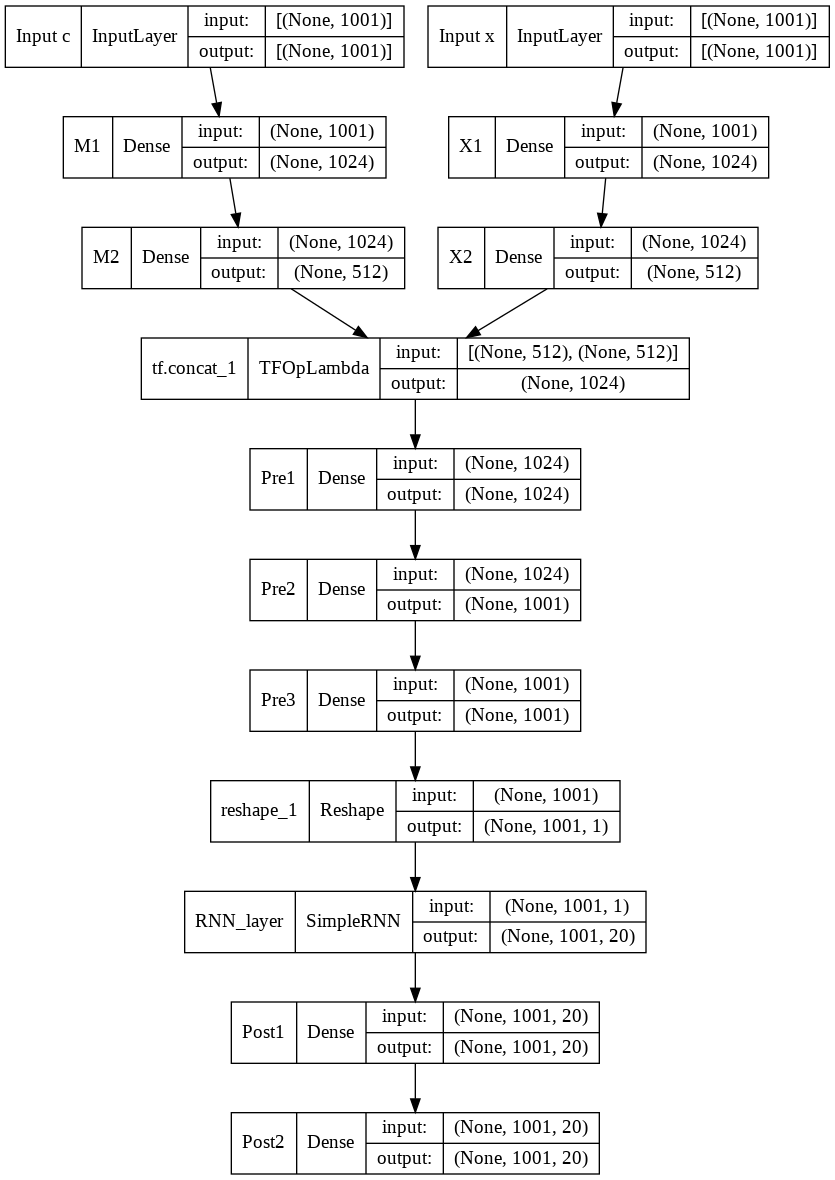

In [ ]:
tf.keras.utils.plot_model(wave_model, show_shapes= True)

In [5]:
# Using Conv layers

act_fn= 'elu';

xc= tfk.Input(shape= (l_c,1), name= 'Input c');
x_c= tfk.layers.Conv1D(filters= 8, kernel_size= 10, strides= 2, padding= 'same', activation= act_fn, name= 'M1')(xc)
x_c= tfk.layers.Conv1D(filters= 4, kernel_size= 5, strides= 2, padding= 'same', activation= act_fn, name= 'M2')(x_c)

xx= tfk.Input(shape= (l_x,1), name= 'Input x');
x_x= tfk.layers.Conv1D(filters= 8, kernel_size= 10, strides= 2, padding= 'same', activation= act_fn, name= 'X1')(xx)
x_x= tfk.layers.Conv1D(filters= 4, kernel_size= 5, strides= 2, padding= 'same', activation= act_fn, name= 'X2')(x_x)

x= tf.concat([x_c, x_x], axis= 1, name= 'Merge layer');
x= tfk.layers.Flatten()(x);
x= tfk.layers.Dense(1024, activation= act_fn, name= 'Pre2')(x);
x= tfk.layers.Dense(1001, activation= act_fn, name= 'Pre3')(x);
#x= tfk.layers.Add()([xx, xc, x])
x= tfk.layers.Dense(1001, activation= act_fn, name= 'Pre4')(x);
x= tfk.layers.Reshape((1001,1))(x)

x= tfk.layers.SimpleRNN(units= nt, activation= 'linear', return_sequences= True, input_shape= (1001,), name= 'RNN_layer')(x)
x= tfk.layers.SimpleRNN(units= nt, activation= 'linear', return_sequences= True, input_shape= (1001,), name= 'RNN_layer2')(x)
x= tfk.layers.Dense(nt, activation= 'linear', name= 'Post1')(x)
x= tfk.layers.Dense(nt, activation= 'linear', name= 'Post2')(x)

wave_model= tfk.Model(inputs= [xc, xx], outputs= x, name= 'wave_model')
wave_model.summary()


Model: "wave_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input c (InputLayer)           [(None, 10, 1)]      0           []                               
                                                                                                  
 Input x (InputLayer)           [(None, 10, 1)]      0           []                               
                                                                                                  
 M1 (Conv1D)                    (None, 5, 8)         88          ['Input c[0][0]']                
                                                                                                  
 X1 (Conv1D)                    (None, 5, 8)         88          ['Input x[0][0]']                
                                                                                         

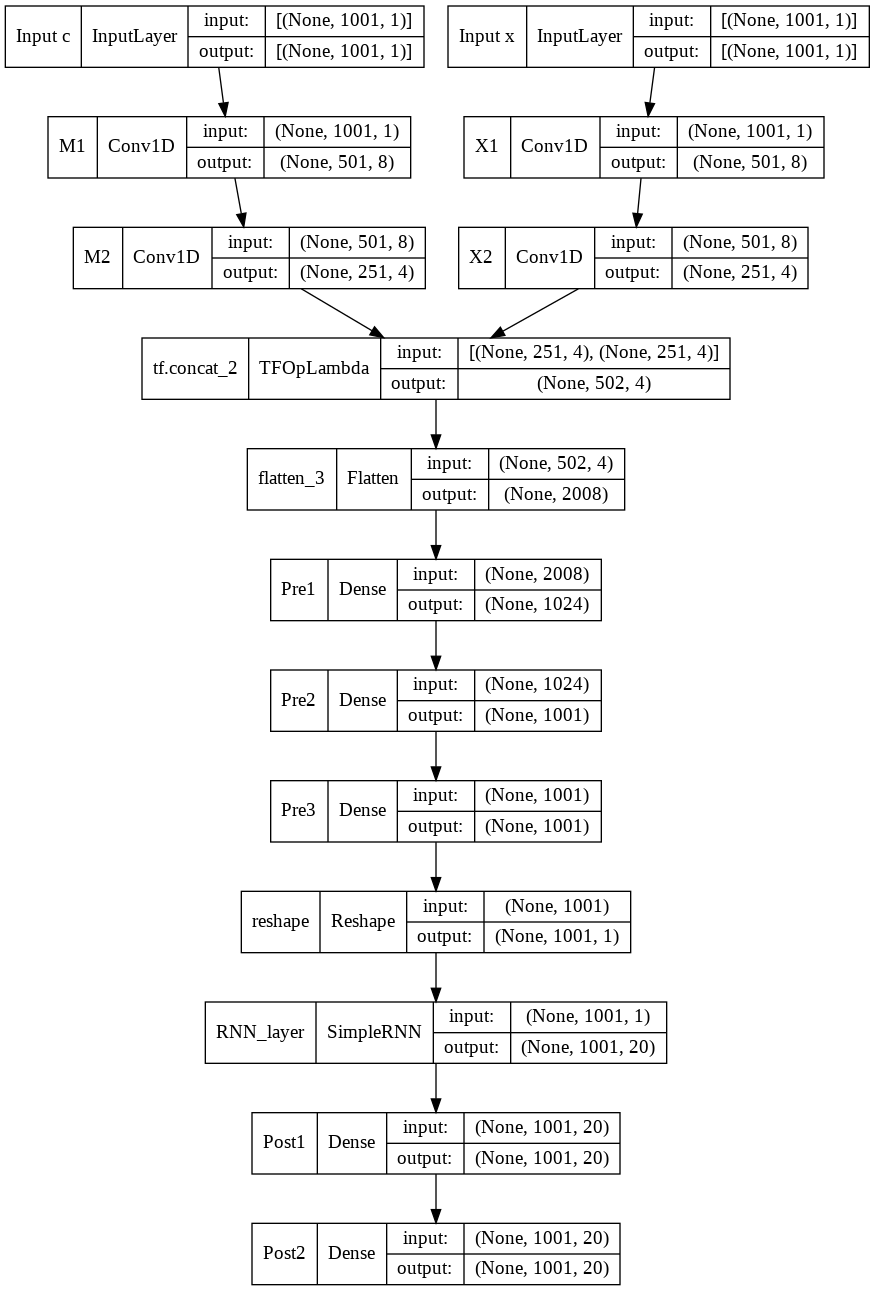

In [ ]:
tfk.utils.plot_model(wave_model, show_shapes= True)